In [10]:
import pandas as pd
import numpy as np

In [11]:
dataset = pd.read_csv('Performance-Stats.csv')
data = pd.read_csv('Performance-Stats.csv')

columns = dataset.columns

new_column_names = []
i = 0
# Iterate through old column names
for column_name in columns:
    # Check if "GPA" is in the column name
    if "Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)" in column_name:
        # Rename "GPA" to "Y"
        new_column_names.append("Y")
    else:
        # Prefix everything else with "X1+"
        new_column_names.append("X" + str(i))
        i = i + 1
        
rename_dict = dict(zip(columns, new_column_names))
# Print new column names

dataset = dataset.rename(columns=rename_dict)
data = data.rename(columns=rename_dict)

dataset

,X0,X1,X2,X3,X4,Y,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2024/03/12 11:05:33 am EET,Female,74.0,NaN,Science,NaN,Private accommodation/ stay with family/friends,NaN,No,3-5,3,1-3,0,0,No,Yes,Close
402,2024/03/12 3:26:14 pm EET,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,Yes,Very close
403,2024/03/13 10:32:19 pm EET,Female,86.0,1st Year,NaN,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,2024/03/13 10:32:27 pm EET,Male,85.0,NaN,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close


The problem with the data above is everything is in text or strings a computer can't interpret it the way a human can. So converting into numerical representations is the solution. This is called data pre-processing. There's two types atleast theyre some of the most popular.

Label Encoding: It assigns a unique integer to each category. For example, '2nd Year' might be encoded as 0, '1st Year' as 1, and so on.
One-Hot Encoding: It creates dummy variables for each category. For example, '2nd Year' might be represented as [1, 0] if it's the first category in the encoding scheme, '1st Year' might be represented as [0, 1], and so on.

We've used label encoder below to fix that issue, one hot encoding could be used but it's not the best suit here. It can be used if the data isn't ordinal (meaningful order). 
Some machine learning algorithms, particularly linear models and tree-based models, might work better with one encoding over the other. For example, tree-based models often handle categorical variables well with either encoding, while linear models might perform better with One-Hot Encoding to avoid imposing artificial ordinal relationships.
One-Hot Encoding increases the dimensionality of the dataset by creating dummy variables for each category. This can be beneficial for some algorithms but might lead to the curse of dimensionality in high-dimensional spaces.
Label Encoding retains the original categorical values in a numerical format, which can be more interpretable than One-Hot Encoding, where each category is represented by multiple binary variables.

If you wanna use one hot encoding for the same problem here's how u can implement it:

dataset = pd.get_dummies(dataset, columns=['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15'])

'''
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15']:
    dataset[column] = label_encoder.fit_transform(dataset[column])

dataset = dataset.drop('X0', axis=1)    

'''
# Apply one-hot encoding to each categorical column
dataset = pd.get_dummies(dataset, columns=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15'])
'''


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15']:
    dataset[column] = label_encoder.fit_transform(dataset[column])

dataset = dataset.drop('X0', axis=1)    
dataset    

,X1,X2,X3,X4,Y,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
0,0,16,1,1,72.0,1,0,0,4,5,4,3,0,1,1,3
1,1,31,1,2,75.0,1,3,1,4,5,2,4,0,0,1,3
2,1,16,0,0,55.0,1,0,0,2,2,4,3,0,0,1,3
3,1,31,1,4,84.0,1,2,0,2,3,4,2,0,1,1,3
4,0,14,1,1,52.0,1,0,0,2,5,3,1,3,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0,14,5,7,NaN,1,5,0,2,3,1,0,0,0,1,0
402,0,13,1,2,58.0,1,2,1,3,1,4,0,0,1,1,3
403,0,27,0,8,NaN,1,0,0,3,2,2,1,0,0,1,3
404,1,26,5,2,NaN,1,0,0,1,4,3,4,0,0,1,0


In [13]:
from sklearn.model_selection import train_test_split

X = dataset
Y = dataset['Y']
dataset['Y'].fillna(0, inplace=True)
print(Y)

# test size basically says how much we're setting aside for testing. everything else is self explanatory
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

Y_test

0      72.0
1      75.0
2      55.0
3      84.0
4      52.0
       ... 
401     0.0
402    58.0
403     0.0
404     0.0
405    63.0
Name: Y, Length: 406, dtype: float64


56     80.0
33     54.0
148    71.0
143    73.0
169    70.0
       ... 
389     0.0
76     60.0
130    60.0
97      0.0
86     60.0
Name: Y, Length: 134, dtype: float64

In [24]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)
model = model.fit(X_train, Y_train)

In [25]:
predictions = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test, predictions))

1.9560062451154536


In [27]:
from sklearn.metrics import r2_score

# Assuming y_true are the true target values and y_pred are the predicted target values
r_squared = r2_score(Y_test, predictions)

# Convert R-squared to percentage
accuracy_percentage = r_squared * 100

print("Accuracy (R-squared) in percentage:", accuracy_percentage)

Accuracy (R-squared) in percentage: 99.11566630243314


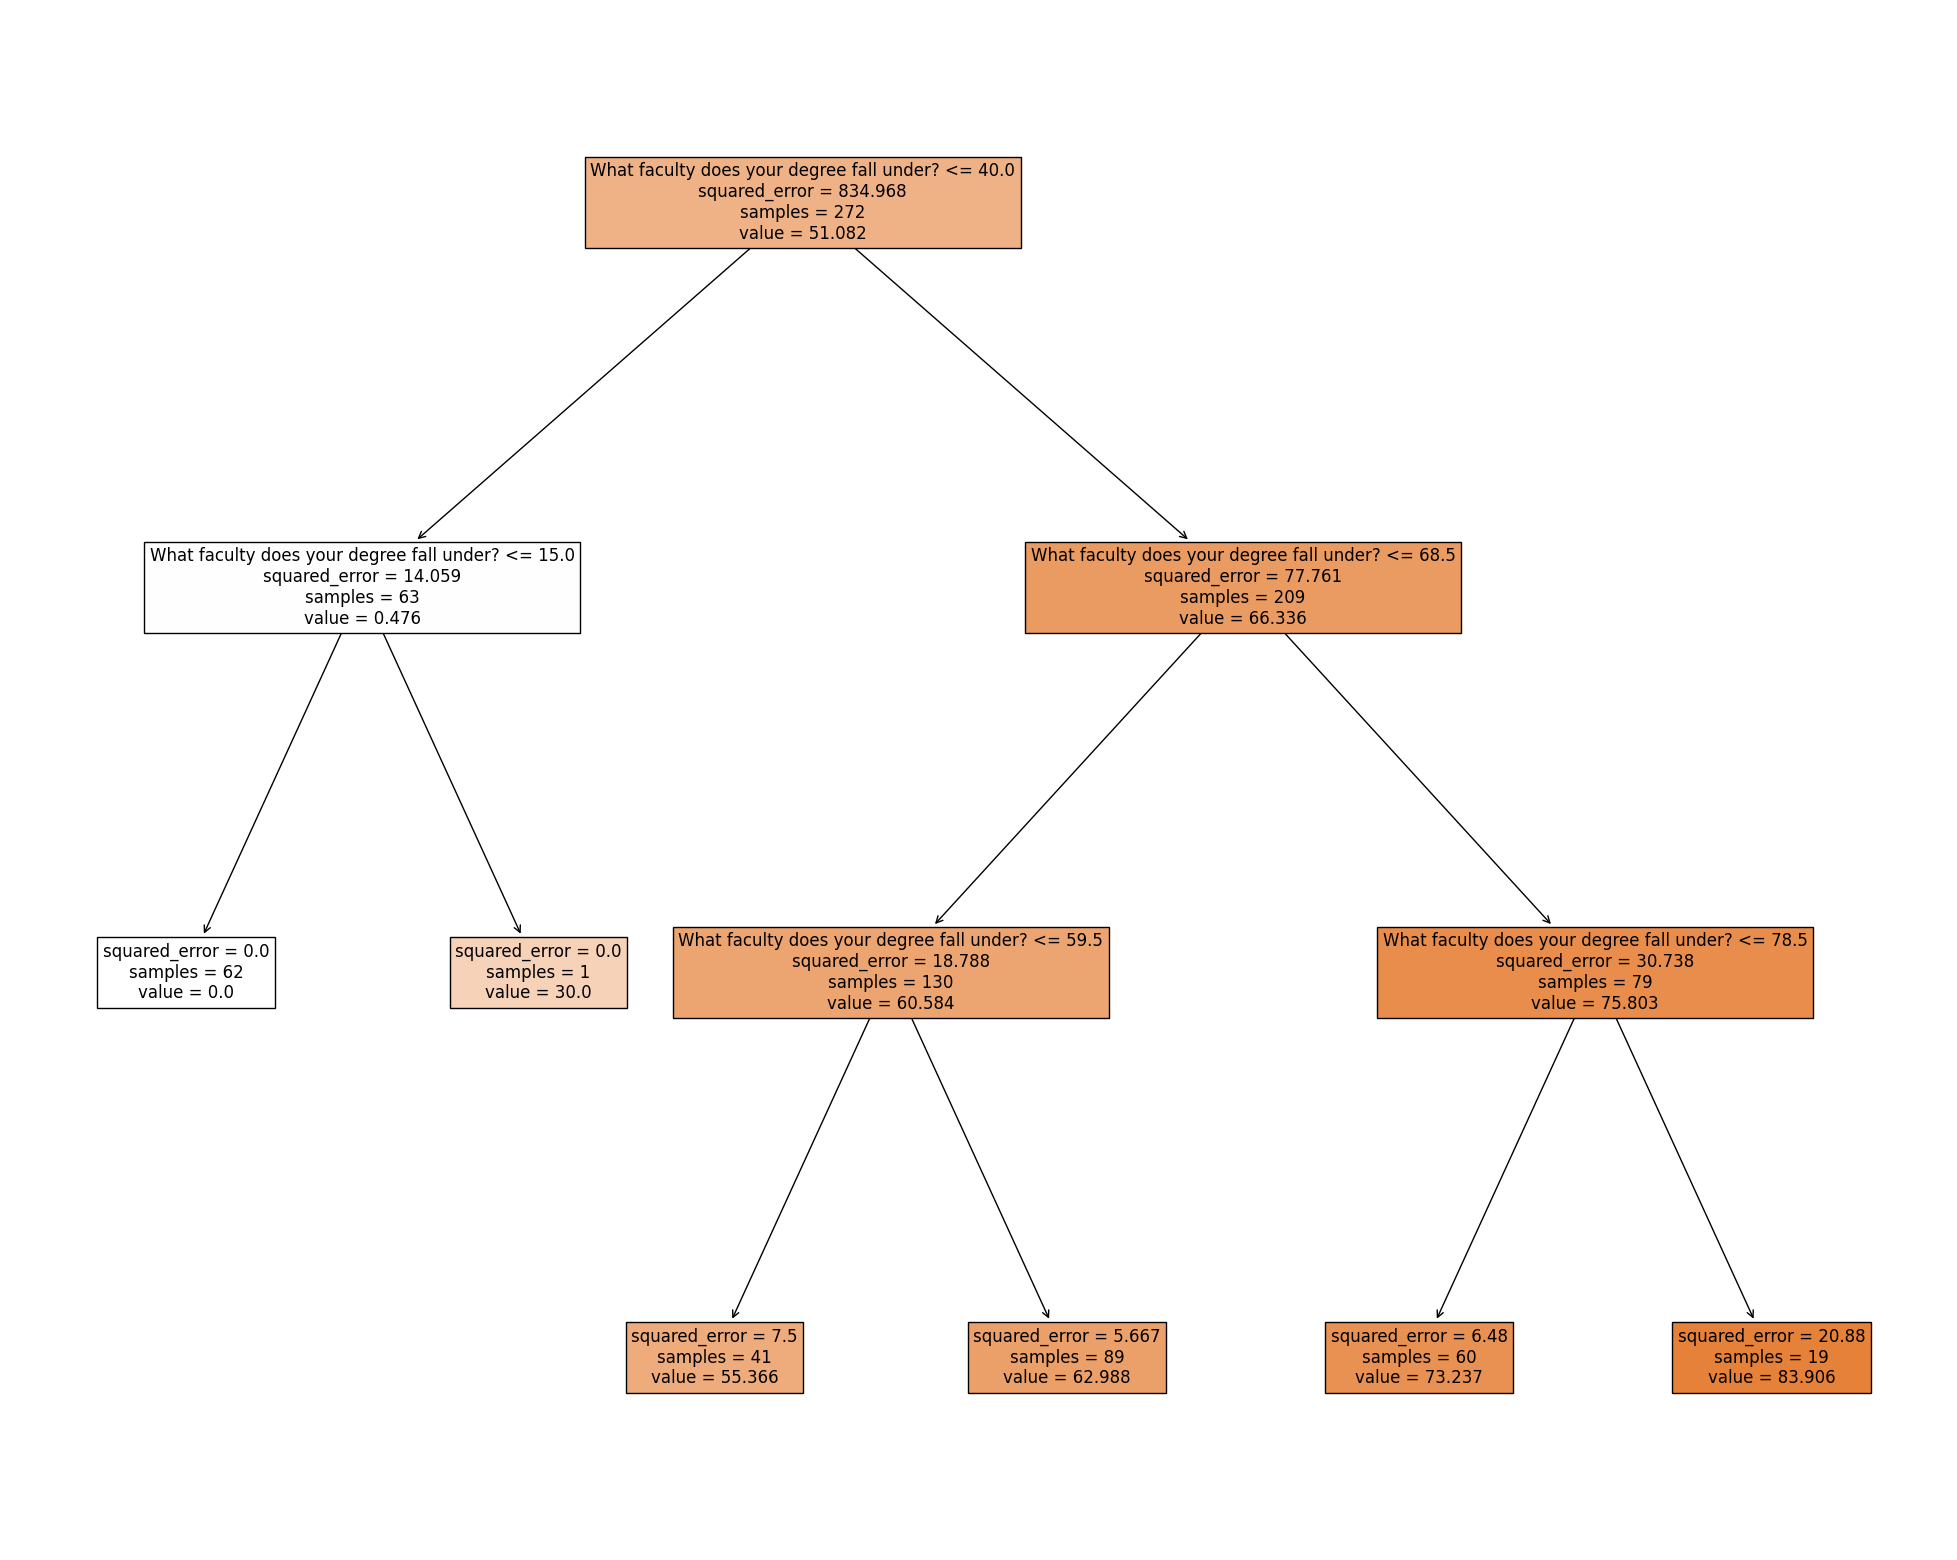

In [28]:
from sklearn import tree
from matplotlib import pyplot as plt

# still gotta figure out data visualisation so much to learn.
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=columns,  
                   filled=True,
                  fontsize=12)